EDA:

Histograms
Contingency tables - David
Density plots
Pairplots?
Heatmap?

Feature selection

Models for prediction (religion): Corey, Miranda
Linear, logistic regression, Decision Trees, Bayes, neural networking: dense layer networks, CNN, kNN

Classification : David
Linear, logistic regression, Decision Trees, Bayes, neural networking: dense layer networks, CNN, kNN, etc



In [1]:
import pandas as pd
import numpy as np
cols = ("names", "landmass", "zone", "area", "population", "language", "religion", "bars", "stripes", "colours", "red", "green", "blue", "gold", "white", "black", "orange", "mainhue", "circles", "crosses", "saltires", "quarters", "sunstars", "crescent", "triangle", "icon", "animate", "text", "topleft", "botright")
df = pd.read_csv("flag.data", header = 0, names = cols)
df

,names,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
189,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
190,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
191,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


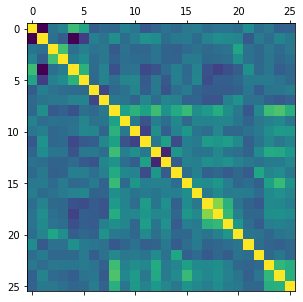

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1.000000,-0.614048,0.013424,0.106555,0.493388,0.326243,-0.137570,-0.066568,-0.068915,0.091192,0.021254,-0.173340,-0.085987,-0.006894,-0.066756,0.022682,0.067628,-0.029322,-0.001906,-0.002903,-0.034499,0.170010,-0.031315,0.022364,-0.116794,-0.109578
zone,-0.614048,1.000000,-0.025604,-0.124773,-0.616187,-0.321709,0.083568,0.005377,0.180322,-0.029867,0.074908,0.202153,0.170389,-0.032639,0.035122,0.050479,-0.044428,0.099833,0.178575,0.152032,0.121604,-0.160835,0.058638,-0.040822,0.103921,0.036250
area,0.013424,-0.025604,1.000000,0.519029,-0.027832,0.087931,0.001189,0.028560,-0.162672,-0.005409,-0.081435,-0.080785,0.014676,-0.098148,-0.120474,-0.050788,-0.005699,-0.057959,-0.025539,-0.002011,0.340568,-0.005080,-0.075448,0.027015,-0.051636,0.024392
population,0.106555,-0.124773,0.519029,1.000000,0.063648,0.172699,-0.041593,0.030387,-0.114986,-0.024453,-0.047621,-0.060807,-0.001753,-0.092485,-0.103610,0.050357,0.051125,-0.076496,-0.059209,-0.041503,0.191347,-0.015647,-0.078356,0.018818,-0.082520,-0.025324
language,0.493388,-0.616187,-0.027832,0.063648,1.000000,0.424937,-0.047071,0.101664,-0.207800,-0.014710,-0.001330,-0.257017,-0.198294,-0.051073,0.084007,-0.061996,0.101531,-0.209326,-0.295339,-0.219238,-0.126218,0.196012,-0.062377,0.016632,-0.130975,-0.081297
religion,0.326243,-0.321709,0.087931,0.172699,0.424937,1.000000,-0.060242,0.103628,-0.017214,0.122057,0.129738,-0.155807,0.023916,-0.167476,0.075386,-0.051426,0.123129,-0.225518,-0.133565,-0.135923,-0.075127,0.053037,0.056700,0.056980,-0.002984,-0.055316
bars,-0.137570,0.083568,0.001189,-0.041593,-0.047071,-0.060242,1.000000,-0.272365,-0.062143,-0.015937,0.119730,-0.131246,0.039668,-0.197662,-0.025520,0.045990,-0.097568,-0.145443,-0.140903,-0.151506,-0.114926,0.021200,-0.134008,0.001317,0.015139,0.067078
stripes,-0.066568,0.005377,0.028560,0.030387,0.101664,0.103628,-0.272365,1.000000,0.034611,0.012559,-0.089157,0.129886,-0.035566,0.124285,0.087179,-0.105354,-0.086406,-0.189558,-0.189943,0.093175,0.215993,-0.009461,-0.004426,-0.113977,-0.156560,-0.110733
colours,-0.068915,0.180322,-0.162672,-0.114986,-0.207800,-0.017214,-0.062143,0.034611,1.000000,0.309925,0.424647,0.302963,0.496806,0.211765,0.369612,0.482017,0.181045,0.257251,0.382266,0.190724,0.031665,-0.172795,0.146314,0.500719,0.550015,0.401879
red,0.091192,-0.029867,-0.005409,-0.024453,-0.014710,0.122057,-0.015937,0.012559,0.309925,1.000000,0.028418,-0.201958,0.079203,-0.035075,0.138880,-0.054788,0.109742,0.103928,0.123006,0.120957,0.019976,-0.090878,0.026868,0.093684,0.135176,0.018329


In [2]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.matshow(df.corr())
plt.show()
corr.style.background_gradient(cmap='coolwarm')

#alternative plot
#from lets_plot.bistro import corr
#corr.corr_plot(df).points().build()

Our data is mostly nominal categorical variables, so a traditional correlation plot fails to help us see meaningful associations. Instead we can use contingency tables with our response variable of interest being religion. 

One such contingency table plots the prescence of certain iconography such as crescents, triangles, and images that are divided into icons (inanimate objects), and animate objects. 

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import dataframe_image as dfi
import sklearn.metrics
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: bold; color: black; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
borders_horizontal = {'selector': 'tr',
         'props': 'border-bottom: 2px solid #000066'}

borders_vertical = {'selector': 'tr',
         'props': 'border-right: 2px solid #000066'}
headers2 = {
    'selector': 'th:not(.index_name)',
    'props': 'border-bottom: 2px solid #000011'
}

In [4]:
data_crosstab = pd.crosstab([df.landmass.map({1:"N.AM", 2:"S.AM", 3:"Euro", 4:"Afri", 5:"Asia", 6:"Ocea"}),
df.crescent, df.triangle, df.icon, df.animate], df.religion.map({0:"Cath", 1:"Chri", 2:"Musl", 3:"Budd", 4:"Hind", 5:"Ethn", 6:"Marx", 7:"Other"}), margins = True, margins_name = "Totals")
print(data_crosstab)

religion                                 Budd  Cath  Chri  Ethn  Hind  Marx  \
landmass crescent triangle icon animate                                       
Afri     0        0        0    0           0     0     5    15     1     0   
                                1           0     1     0     2     0     0   
                           1    0           0     0     2     3     0     0   
                                1           0     0     0     2     0     0   
                  1        0    0           0     1     0     2     0     0   
                           1    0           0     0     0     1     0     0   
                                1           0     0     0     1     0     0   
         1        0        0    0           0     0     0     0     0     0   
Asia     0        0        0    0           2     0     0     0     0     4   
                                1           1     0     0     0     0     0   
                           1    0           1     0 

In [5]:
cm = sns.light_palette("green", as_cmap=True)
mytable_dat2 = (data_crosstab.style
  .background_gradient(cmap=cm)
  .highlight_max(axis=1, props='color:black; font-weight:bold;')
  .set_caption('Contingency Table')
  .set_table_styles([cell_hover, index_names, headers, borders_horizontal, borders_vertical, headers2]))
###dfi.export(mytable_dat2, 'mytable2.png')
mytable_dat2 


In [6]:
import dataframe_image as dfi
#dfi.export(mytable_dat2, 'flagcrosstab1.png')